Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#1. Exploratory Data Analysis

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset /Hotel demand dataset/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# replace the null
rep = {"children:": 0, "country": "Unknown", "agent": 0, "company": 0}
df1 = df.fillna(rep)

In [6]:
df1.drop(
    df1.loc[
        df1['adults']
        + df1['children']
        + df1['babies'] == 0].index,
    inplace=True
)

In [7]:
df1['meal'].replace('Undefined', 'SC', inplace = True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [9]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
df1.shape

(119210, 32)

In [11]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104047,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398842,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Questions using and solving by visualizations

## Where do the guests come from?

In [12]:
country_counts = df1['country'].value_counts()

fig = px.choropleth(
    country_counts,
    locations = country_counts.index,
    color = country_counts.values,
    title = "Where do the guests come from?",
    labels = {'color':'Number of Guests'}
)

fig.show()

From the above, it shows that the most people come from
*   Portugal
*   UK
*   France
*   Spain
*   Germany



In [13]:
resort_hotel  = df1[df1['hotel'] == 'Resort Hotel']
city_hotel = df1[df1['hotel'] == 'City Hotel']

In [14]:
country_counts_resort = resort_hotel['country'].value_counts()

fig = px.choropleth(
    country_counts_resort,
    locations = country_counts_resort.index,
    color = country_counts_resort.values,
    title = "Where do the guests come from to Resort Hotel?",
    labels = {'color':'Number of Guests'}
)

fig.show()

Guests originating from Portugal, UK, and Spain constitute the largest visitor group at the Resort Hotel.

In [15]:
country_counts_city = city_hotel['country'].value_counts()

fig = px.choropleth(
    country_counts_city,
    locations = country_counts_city.index,
    color = country_counts_city.values,
    title = "Where do the guests come from to City Hotel?",
    labels = {'color':'Number of Guests'}
)

fig.show()

The most guest that visits Resort Hotel are from

* Portugal
* France
* Germany
* UK
* Spain

##How much do guests pay for a room per night?

In [16]:

# The Distribution of the Average Daily Rate or ADR
# Understanding the price guests pay per night

# Counting adults and children as paying guests only
df['paying_guests'] = df['adults'] + df['children']

# Filter out rows where there are no paying guests
df1 = df[df['paying_guests'] > 0]

resort_hotel = df1[df1['hotel'] == 'Resort Hotel']
city_hotel = df1[df1['hotel'] == 'City Hotel']

In [17]:
# Combine both datasets for plotting
resort_hotel['hotel_type'] = 'Resort Hotel'
city_hotel['hotel_type'] = 'City Hotel'
combined_df = pd.concat([resort_hotel, city_hotel])

<ipython-input-17-181abee4b97a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-181abee4b97a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
# Box plot for checking price variability
fig = px.box(
    combined_df,
    x = 'reserved_room_type',
    y = 'adr',
    color = 'hotel_type',
    title = 'Room Price by room type for Resort and City Hotels',
    labels = {'reserved_room_type':'Room Type', 'adr':'Price[EUR]', 'Hotel_type':'Hotel Type'}
)

# setting range
fig.update_layout(
    yaxis = dict(range = [0, 500])
)


fig.show()

From above, the box plot shows that the distribute of average price per room.
it depends on type and the standard deviation

### **Summary of the Prices**
* Price Variability: In general, Resort Hotel have a higher price variability compared to City Hotel, which can be observed by the wider IQRs and the outliers.
* A median prices: Resort Hotel tend to have higher median prices for the most room types compared to city hotels.
* Room type specifics: Some room types C, G and H, for instance, in Resort Hotel are priced higher than other types of accommodation, which may reflect better amenities or views associated with these room types.

## How does the price per night var over the year?

* room price monthly
* ordered month

In [19]:
# Plot showing the monthly variation in ADR to observe any seasonal trends in pricing
df1['adr_pp'] = df1['adr'] / df1['paying_guests']


room_price_monthly = df1[
    ["hotel", "arrival_date_month", "adr_pp"]
].sort_values("arrival_date_month")

ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

room_price_monthly['arrival_date_month'] = pd.Categorical(
    room_price_monthly["arrival_date_month"],
    categories=ordered_months,
    ordered=True)

monthly_adr = room_price_monthly.groupby(
    ["hotel", "arrival_date_month"]
)['adr_pp'].mean().reset_index()


<ipython-input-19-052943dffeeb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Create a chart plot for analysis
fig = px.line(
    monthly_adr,
    x = 'arrival_date_month',
    y = 'adr_pp',
    color = 'hotel',
    title ='Monthly ADR Variation per Person for Resort and City Hotels',
    labels = {'adr_pp':'Average Daily Rate per Person(ADR_PP)', 'arrival_date_month':'month'}
)

# layout for better readability

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ordered_months,
        ticktext = ordered_months
    )
)


fig.show()

### Summary point
* Higher price in summer seasonal: Resort Hotel are higher during June to August.
* The peak in July: The peak of resort hotels in July was more pronounced than that of city hotels, suggesting either higher demand or increased pricing strategies during the peak vacation season.

## Which are the most busy months?

In [21]:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({
    "month":list(resort_guests_monthly.index),
    "hotel":"Resort hotel",
    "guests":list(resort_guests_monthly.values)
})

city_guest_data = pd.DataFrame({
    "month":list(city_guests_monthly.index),
    "hotel":"City Hotel",
    "guests":list(city_guests_monthly.values)
})

full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index = True)

# order by month
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
full_guest_data["month"] = pd.Categorical(
    full_guest_data['month'], categories = ordered_months, ordered = True
)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

full_guest_data = full_guest_data.sort_values("month")


In [22]:
# Create a chart plot for analysis

fig = px.line(
    full_guest_data,
    x = 'month',
    y = 'guests',
    color = 'hotel',
    title = 'Monthly Bookings',
    labels = {'month':'Month', 'guests':'Number of guests'}
)

fig.show()

### Peak seasons
* City hotels see high bookings in spring (March to May) and autumn (July to September), indicating different peak times, but go down in summer (June to August) it might be pefered a guests tend to book the resort hotels.


## How long do people stay at the hotels?

In [23]:
resort_hotel['total_nights'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']
city_hotel['total_nights'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']

# resort : create a data frame
number_nights_resort = list(resort_hotel["total_nights"].value_counts().index)
number_bookings_resort = list(resort_hotel["total_nights"].value_counts())
rel_bookings_resort = resort_hotel["total_nights"].value_counts() / sum(number_bookings_resort)*100

resort_nights = pd.DataFrame(
    {
        "hotel" : "Resort hotel",
        "num_nights" : number_nights_resort,
        "rel_num_bookings" : rel_bookings_resort
    }
)

# city : create a data frame
number_nights_city = list(city_hotel["total_nights"].value_counts().index)
number_bookings_city = list(city_hotel["total_nights"].value_counts())
rel_bookings_city = city_hotel["total_nights"].value_counts() / sum(number_bookings_city) * 100

city_nights = pd.DataFrame(
    {
        "hotel": "City hotel",
        "num_nights": number_nights_city,
        "rel_num_bookings": rel_bookings_city
    }
)


# Intregation a both data frame
total_nights = pd.concat([resort_nights, city_nights], ignore_index = True)

<ipython-input-23-7a5ec92f822e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-7a5ec92f822e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Create a bar chart for analysis
fig = px.bar(
    total_nights,
    x='num_nights',
    y='rel_num_bookings',
    color='hotel',
    title='Length of stay',
    labels={'num_nights':'Number of nights', 'rel_num_bookings':'Guests [Percentage%]'},
    barmode='group'
)

# setting x-axis layout
fig.update_layout(xaxis = dict(range = [0, 20]))

fig.show()

In [25]:
# Calculation the average nights that guest stays in hotels
avg_night_resort = round(sum(list((resort_nights["num_nights"] * (resort_nights["rel_num_bookings"]/100)).values)))
avg_night_city = round(sum(list((city_nights["num_nights"] * (city_nights["rel_num_bookings"]/100)).values)))

print(f'Average nights for guests stays in Resort Hotel is {avg_night_resort}\n'
f'Average nights for guests stays in City Hotel is {avg_night_city}')

Average nights for guests stays in Resort Hotel is 4
Average nights for guests stays in City Hotel is 3


###Length of stay trends
* For Resort Hotel, guest obviously average stay 4 nights, but 7 nights as being very poppular.
* For City Hotel, guest average stay 3 nights a Resort Hotel, but 2 and 3 nights are also popular.

In [26]:
#Check about booking by market segment
#Create a pie chart for analysis
market_segments = df1['market_segment'].value_counts()

fig = px.pie(
    values = market_segments.values,
    names = market_segments.index,
    title = 'Booking by Market Segment'
)

fig.show()

### The most popular market segments
* Online TA
* Offline TA/TO

## What market segment that has the highest price for booking hotel?

<ipython-input-27-2bad1ce7ac53>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-27-2bad1ce7ac53>:2: FutureWarning:



The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.




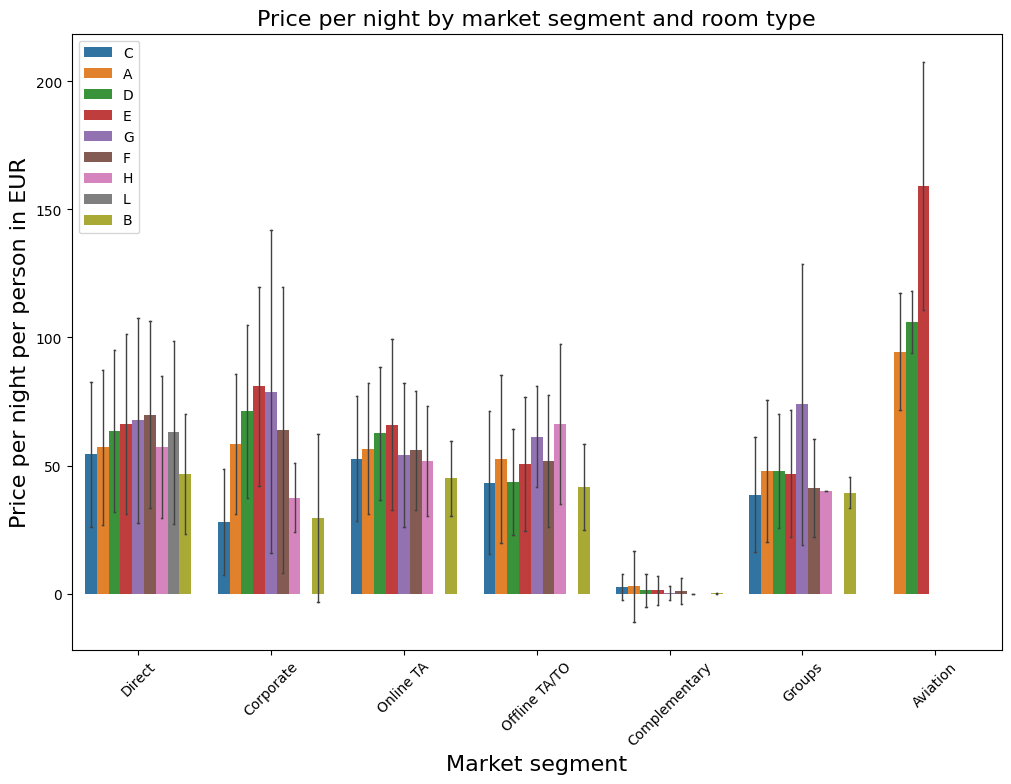

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=df1,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("Price per night by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price per night per person in EUR", fontsize=16)
plt.legend(loc="upper left")
plt.show()

### From the above

* Aviation(airlines) have the highest price


## Why Aviation have the highest price?

In [28]:
airlines = df1.loc[df1['market_segment'] == 'Aviation'][
    [
       'is_canceled',
       'adults',
       'lead_time',
       'adr_pp'
    ]
].describe()



non_airlines = df1.loc[df1['market_segment'] != 'Aviation'][
    [
        'is_canceled',
        'adults',
        'lead_time',
        'adr_pp'
    ]
].describe()

In [29]:
print(airlines)

       is_canceled      adults  lead_time      adr_pp
count   235.000000  235.000000  235.00000  235.000000
mean      0.221277    1.012766    4.47234  100.270979
std       0.415992    0.112503    4.61629   20.376689
min       0.000000    1.000000    0.00000    0.000000
25%       0.000000    1.000000    1.00000   95.000000
50%       0.000000    1.000000    3.00000   95.000000
75%       0.000000    1.000000    6.00000  110.000000
max       1.000000    2.000000   23.00000  193.500000


In [30]:
print(non_airlines)

         is_canceled         adults      lead_time         adr_pp
count  118971.000000  118971.000000  118971.000000  118971.000000
mean        0.371040       1.860865     104.309437      55.038212
std         0.483085       0.574499     106.889067      29.016998
min         0.000000       0.000000       0.000000      -3.190000
25%         0.000000       2.000000      18.000000      37.440000
50%         0.000000       2.000000      69.000000      49.500000
75%         1.000000       2.000000     161.000000      66.000000
max         1.000000      55.000000     737.000000    2700.000000


### The Aviation
* The significantly shorter lead time in the aviation industry, just 4 days compared to 104 days in other industries, could be a major factor contributing to higher prices.
* The demand for rooms for flight crews, often booked by airlines, can increase overall demand and push prices upward.

## How many bookings were canceled?

In [31]:
bookings_canceled = df1['is_canceled'].value_counts()

#Create a bar chart for analysis
fig = px.bar(
    bookings_canceled,
    x = bookings_canceled.index,
    y = bookings_canceled.values,
    title = 'Cancellation Vs Non-Cancellation',
    labels = {'x':'Is canceled', 'y':'Number of Bookings'}
)

fig.show()

In [32]:
#clarify between resort hotel and city hotel

#Resort
resort_canceled = df1.loc[df1['hotel'] == 'Resort Hotel']['is_canceled'].sum()
resort_canceled_percentage = round(resort_canceled / df1.loc[df1['hotel'] == 'Resort Hotel'].shape[0] * 100, 2)

#City
city_canceled = df1.loc[df1['hotel'] == 'City Hotel']['is_canceled'].sum()
city_canceled_percentage = round(city_canceled / df1.loc[df1['hotel'] == 'City Hotel'].shape[0] * 100, 2)


print(f"Total booking canceled: {df1['is_canceled'].sum()}, {round(df1['is_canceled'].sum() / df1.shape[0] * 100, 2)} %")
print(f"Resort Hotel canceled: {resort_canceled}, {resort_canceled_percentage}%")
print(f"City Hotel canceled: {city_canceled}, {city_canceled_percentage}%")

Total booking canceled: 44195, 37.07 %
Resort Hotel canceled: 11120, 27.77%
City Hotel canceled: 33075, 41.78%


City hotels often experience significantly higher cancellation rates compared to resort hotels, potentially due to differing booking patterns such as business travel versus leisure, or other factors like flexibility in location choice and booking policies.

In [59]:
# Cancellation by months

# resort
resort_booking_per_month = df1.loc[df1['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['hotel'].count()
resort_cancel_per_month = df1.loc[df1['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['is_canceled'].sum()

resort_cancel_data = pd.DataFrame(
      {
          "Hotel": "Resort Hotel",
          "Month": list(resort_booking_per_month.index),
          "Bookings": list(resort_booking_per_month.values),
          "Cancelations": list(resort_cancel_per_month.values)
      }
)

# city
city_booking_pere_month = df1.loc[df1['hotel'] == 'City Hotel'].groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = df1.loc[df1['hotel'] == 'City Hotel'].groupby('arrival_date_month')['is_canceled'].sum()

city_cancel_data = pd.DataFrame(
      {
          "Hotel": "City Hotel",
          "Month": list(city_booking_pere_month.index),
          "Bookings": list(city_booking_pere_month.values),
          "Cancelations": list(city_cancel_per_month.values)
      }
)



canceled_df = pd.concat([resort_cancel_data, city_cancel_data],
                        ignore_index=True)
canceled_df['Canceled_percent'] = canceled_df['Cancelations'] / canceled_df['Bookings'] * 100

ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

canceled_df['Month'] = pd.Categorical(canceled_df['Month'], categories=ordered_months, ordered=True)
canceled_df = canceled_df.sort_values('Month')

In [62]:
# Create a bar chart for analysis
fig = px.bar(
    canceled_df,
    x = 'Month',
    y = 'Canceled_percent',
    color = 'Hotel',
    title = 'Cancellation per month by hotels',
    labels = {'Month':'Month', 'Canceled_percent':'Cancelations [Percentage%]'},
    barmode = 'group'
)

fig.show()

## Cancellations summary

### Resort Hotel
* a lower cancellation rate, generally ranging from 15% to 35%. Summer months and September tend to have higher cancellation rates, nearing 30% to 35%. Conversely, January and November exhibit the lowest cancellation rates, with January falling below 20%."

### City Hotel
* City hotel generally have higher cancellation rates compared to resorts, often exceeding 40%. April, May, June, and October experience the highest cancellation rates, reaching or surpassing 45%. September, October, and December also exhibit high cancellation rates, hovering around 40%. March typically sees the lowest cancellation rates at approximately 37%.

## Seasonal trends
* Resort Hotel: the significantly higher cancellation rates happen during the summer months, due to the higher volume of booking, which means, it been a peak season.
* City Hotel: of course, it consistenly high cancellation rate all the months, which might consequence to change on travel plans or business reschedules.

## Overall trends
* The significantly higher cancellation rates in City hotel compared to Resort Hotel, it shows behavior between the two types of accommodations
* One of factor, including the business travel, where plans are often subject to change.